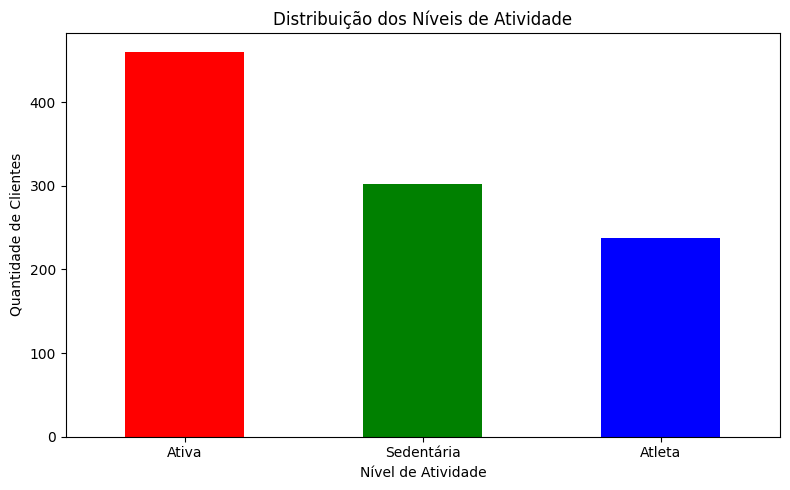

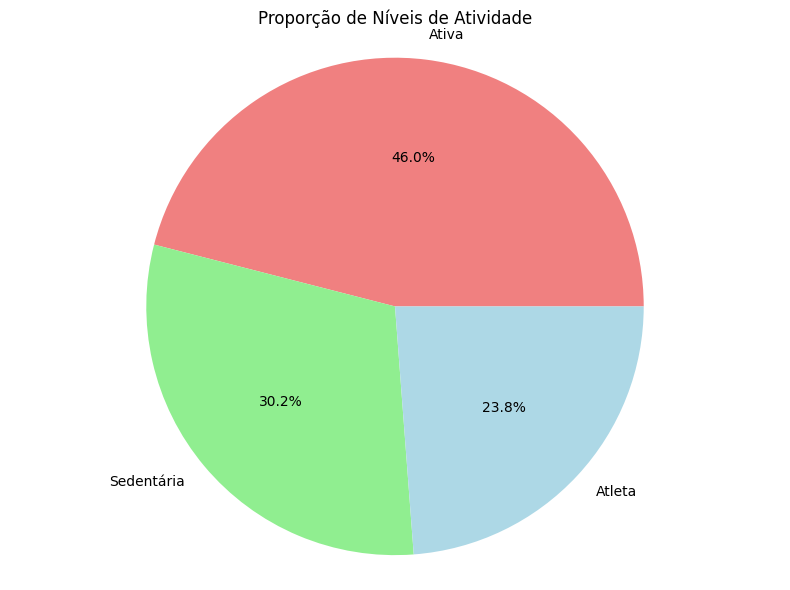

Accuracy Score: 0.99 (99.00%)
Relatório de Classificação:

              precision    recall  f1-score   support

  Sedentária       1.00      1.00      1.00        60
       Ativa       0.98      1.00      0.99        92
      Atleta       1.00      0.96      0.98        48

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


Dataset limpo salvo como 'academia_redfit_limpo.csv'

Total de clientes: 1000
Sedentários: 302
Ativos: 460
Atletas: 238


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_csv('academia_redfit.csv')


df['frequencia_semanal_treino'].fillna(0, inplace=True)
df['minutos_totais_semana'].fillna(0, inplace=True)


def classificar_nivel(freq, minutos):
    if freq == 0 or minutos == 0:
        return 'Sedentária'
    elif freq >= 5 and minutos >= 300:
        return 'Atleta'
    elif freq >= 2:
        return 'Ativa'
    else:
        return 'Sedentária'


df['nivel_atividade'] = df.apply(lambda x: classificar_nivel(
    x['frequencia_semanal_treino'],
    x['minutos_totais_semana']
), axis=1)


df['imc_estimado'] = df['idade'] / 2 + 20


plt.figure(figsize=(8, 5))
contagem = df['nivel_atividade'].value_counts()
cores = ['red', 'green', 'blue']
contagem.plot(kind='bar', color=cores)
plt.title('Distribuição dos Níveis de Atividade')
plt.xlabel('Nível de Atividade')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.pie(contagem.values, labels=contagem.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Proporção de Níveis de Atividade')
plt.axis('equal')
plt.tight_layout()
plt.show()


X = df[['idade', 'frequencia_semanal_treino', 'minutos_totais_semana',
        'primeiro_PGC', 'ultimo_PGC', 'imc_estimado']].values


y = df['nivel_atividade'].values


encoder = OrdinalEncoder(categories=[['Sedentária', 'Ativa', 'Atleta']])
y_enc = encoder.fit_transform(y.reshape(-1, 1)).ravel()


X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy} ({accuracy*100:.2f}%)")

y_pred = model.predict(X_test)
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=['Sedentária', 'Ativa', 'Atleta']))


df_clean = df.copy()
df_clean.to_csv('academia_redfit_limpo.csv', index=False)
print("\nDataset limpo salvo como 'academia_redfit_limpo.csv'")

print(f"\nTotal de clientes: {len(df)}")
print(f"Sedentários: {contagem.get('Sedentária', 0)}")
print(f"Ativos: {contagem.get('Ativa', 0)}")
print(f"Atletas: {contagem.get('Atleta', 0)}")

